# **Python Iterators**
## **What is a Python iterator?**
* An iterator is an object that implements:

  * __iter__ method that returns the object itself.
  * __next__ method that returns the next item. If all the items have been returned, the method raises a StopIteration exception.
* Note that these two methods are also known as the iterator protocol.

* Python allows you to use iterators in for loops, comprehensions, and other built-in functions including map, filter, reduce, and zip

## **Python iterator example**
* The following example defines Square iterator class that returns the square numbers. Note that a square number is a product of an integer with itself.


In [1]:
class Square:
    def __init__(self, length):
        self.length = length
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current >= self.length:
            raise StopIteration

        self.current += 1
        return self.current ** 2

## **How it works?**

* First, initialize the length and current attributes in the __init__ method.

* The length attribute specifies the number of square numbers that the class should return. And the current attribute keeps track of the current integer..

* Second, implement the __iter__ method that returns the self object.

* Third, implement the __next__ method that returns the next square number. If the number of square numbers have been returned is greater than the length, the __next__ method raises the StopIteration exception.

## **Using the iterator object**
* The following shows how to use the Square iterator in a for loop:


In [2]:
square = Square(5)

for sq in square:
    print(sq)

1
4
9
16
25


## **How it works?**

* First, create a new instance of the Square class.
* Then, use the for loop to iterate over items of the square iterator.
* Once you iterate over all the items, the iterator is exhausted. It means you need to create a new iterator to iterate over its items again.

* If you attempt to use the iterator that is already exhausted, you’ll get the StopIteration exception. For example:


In [3]:
next(square)

StopIteration: ignored

* Also, an iterator cannot be restarted because it only has the __next__ method that returns the next item from a collection.

# **Python Iterator vs Iterable**
## **Iterators**
* An iterator is an object that implements the iterator protocol. In other words, an iterator is an object that implements the following methods:

  * __iter__ returns the iterator object itself.
  * __next__ returns the next element.
* Once you complete iterating a collection using an iterator, the iterator becomes exhausted.

* It means that you cannot use the iterator object again.

## **Iterables**
* An iterable is an object that you can iterate over.

* An object is iterable when it implements the __iter__ method. And its __iter__ method returns a new iterator.

## **Examining the built-in list and list iterator**
* In Python, a list is an ordered collection of items. It’s also an iterable because a list object has the __iter__ method that returns an iterator. 
* For example:


In [4]:
numbers = [1, 2, 3]

number_iterator = numbers.__iter__()
print(type(number_iterator))

<class 'list_iterator'>


* In this example, the __iter__ method returns an iterator with the type list_iterator.

* Because the list_iterator implements the __iter__ method, you can use the iter built-in function to get the iterator object:


In [5]:
numbers = [1, 2, 3]
number_iterator = iter(numbers)

* Since the list_iterator also implements the __next__ method, you can use the built-in function next to iterate over the list:


In [6]:
numbers = [1, 2, 3]

number_iterator = iter(numbers)

next(number_iterator)
next(number_iterator)
next(number_iterator)

3

In [7]:
#If you call the next function once more, you’ll get a StopIteration exception.
next(number_iterator)

StopIteration: ignored

* This is because the list iterator has been exhausted. To iterate the list again, you need to create a new iterator.

* This illustrates the separating the list from its iterator. The list is created once while the iterator is created every time you need to iterate over the list.

### **Python Iterator and Iterable**
* The following defines the Colors class:


In [9]:
class Colors:
    def __init__(self):
        self.rgb = ['red', 'green', 'blue']
        self.__index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.__index >= len(self.rgb):
            raise StopIteration

        # return the next color
        color = self.rgb[self.__index]
        self.__index += 1
        return color

* In this example, the Colors class plays two roles: iterable and iterator.

* The Colors class is an iterator because it implements both __iter__ and __next__ method. The __iter__ method returns the object itself. And the __next__ method returns the next item from a list.

* The Colors class is also an iterable because it implements the __iter__ method that returns an object itself, which is an iterator.

* The following creates a new instance of the Colors class and iterates over its elements using a for loop:


In [10]:
colors = Colors()

for color in colors:
    print(color)

red
green
blue


* Once you complete iterating, the colors object becomes useless. If you attempt to iterate it again, you’ll get a StopIteration exception:


In [11]:
next(colors)

StopIteration: ignored

In [12]:
#If you use the for loop, you’ll get nothing back. The iterator is empty:
for color in colors:
    print(color)

* To iterate again, you need to create a new colors object with the rgb attribute. This is inefficient.

## **Separating an iterator from an iterable**
* Let’s separate the color iterator from its iterable like what Python does with the list iterator and list.

* The following defines the Colors class:


In [13]:
class Colors:
    def __init__(self):
        self.rgb = ['red', 'green', 'blue']

    def __len__(self):
        return len(self.rgb)

In [14]:
#The following defines the ColorIterator class:
class ColorIterator:
    def __init__(self, colors):
        self.__colors = colors
        self.__index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.__index >= len(self.__colors):
            raise StopIteration

        # return the next color
        color = self.__colors.rgb[self.__index]
        self.__index += 1
        return color

## **How it works.**

* The __init__ method accepts an iterable which is an instance of the Colors class.
* The __iter__ method returns the iterator itself.
* The __next__ method returns the next element from the Colors object.
* The following shows how to use the ColorIterator to iterate over the Colors object:


In [15]:
colors = Colors()
color_iterator = ColorIterator(colors)

for color in color_iterator:
    print(color)

red
green
blue


* To iterate the Colors object again, you just need to create a new instance of the ColorIterator.

* There’s one problem!

* When you want to iterate the Colors object, you need to manually create a new ColorIterator object. And you also need to remember the iterator name ColorIterator.

* It would be great if you can automate this. To do it, you can make the Colors class iterable by implementing the __iter__ method:



In [16]:
class Colors:
    def __init__(self):
        self.rgb = ['red', 'green', 'blue']

    def __len__(self):
        return len(self.rgb)

    def __iter__(self):
        return ColorIterator(self)

* The __iter__ method returns a new instance of the ColorIterator class.

* Now, you can iterate the Colors object without explicitly creating the ColorIterator object:


In [17]:
colors = Colors()

for color in colors:
    print(color)


red
green
blue


* Internally, the for loop calls the __iter__ method of the colors object to get the iterator and uses this iterator to iterate over the elements of the colors object.

* The following places the ColorIterator class inside the Colors class to encapsulate them into a single class:


In [18]:
class Colors:
    def __init__(self):
        self.rgb = ['red', 'green', 'blue']

    def __len__(self):
        return len(self.rgb)

    def __iter__(self):
        return self.ColorIterator(self)

    class ColorIterator:
        def __init__(self, colors):
            self.__colors = colors
            self.__index = 0

        def __iter__(self):
            return self

        def __next__(self):
            if self.__index >= len(self.__colors):
                raise StopIteration

            # return the next color
            color = self.__colors.rgb[self.__index]
            self.__index += 1
            return color


### **Python iter**
#### **Introduction to the Python iter function**
* The iter() function returns an iterator of a given object:
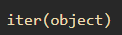


* The iter() function requires an argument that can be an iterable or a sequence. In general, the object argument can be any object that supports either iteration or sequence protocol.

* When you call the iter() function on an object, the function first looks for an __iter__() method of that object.

* If the __iter__() method exists, the iter() function calls it to get an iterator. Otherwise, the iter() function will look for a __getitem__() method.

* If the __getitem__() is available, the iter() function creates an iterator object and returns that object. Otherwise, it raises a TypeError exception.

* The following flowchart illustrates how the iter() function works:
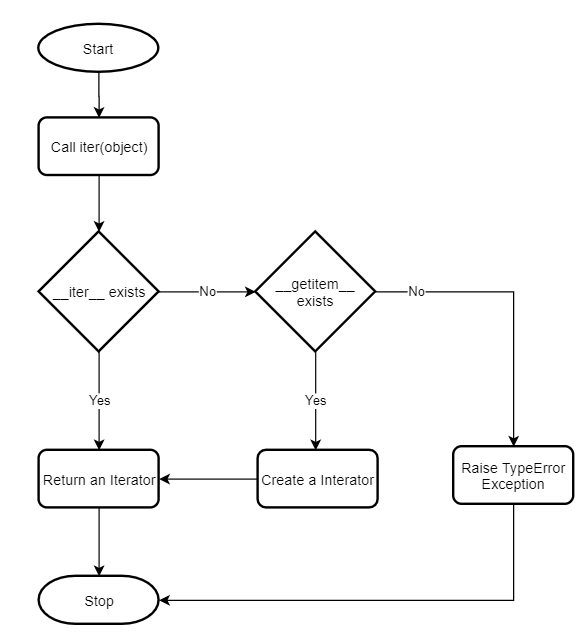

### **Python iter() function examples**
* The following example defines a simple Counter class and uses the iter() function to get an iterator of the counter object:


In [19]:
class Counter:
    def __init__(self):
        self.__current = 0


counter = Counter()
iterator = iter(counter)


TypeError: ignored

In [20]:
#The following adds the __getitem__() method to the Counter class:
class Counter:
    def __init__(self):
        self.current = 0

    def __getitem__(self, index):
        if isinstance(index, int):
            self.current += 1
            return self.current

* Because the Counter implements the __getitem__() method that returns an element based on an index, it’s a sequence.

* Now, you can use the iter() function to get the iterator of the counter:


In [21]:
counter = Counter()

iterator = iter(counter)
print(type(iterator))

<class 'iterator'>


* In this case, Python creates an iterator object and returns it. 
* Hence, you can use the iterator object to iterate the counter:


In [22]:
for _ in range(1, 4):
    print(next(iterator))

1
2
3


* The following adds the CounterIterator class to the Counter class and implement the iterable protocol:

In [23]:
class Counter:
    def __init__(self):
        self.current = 0

    def __getitem__(self, index):
        if isinstance(index, int):
            self.current += 1
            return self.current

    def __iter__(self):
        return self.CounterIterator(self)

    class CounterIterator:
        def __init__(self, counter):
            self.__counter = counter

        def __iter__(self):
            return self

        def __next__(self):
            self.__counter.current += 1
            return self.__counter.current

* How it works.

  * The Counter class implements the __iter__() method that returns an iterator. The return iterator is a new instance of the CounterIterator.
  * The CounterIterator class supports the iterator protocol by implementing the __iter__() and __next__() methods.
  * When both __iter__() and __getitem__() methods exist, the iter() function always uses the __iter__() method:


* In this example, the iter() function calls the __iter__() method instead of __getitem__() method. That’s why you see the CounterIterator in the output.

### **The second form of the Python iter() function**
* The following shows the second form of the iter() function:
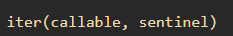

* The iter(callable,sentinel) will call a callable when the next() method is called.

* It’ll return the value returned by the callable or raise the StopIteration exception if the result is equal to the sentinel value.

* Let’s take an example to understand how the iter(callable, sentinel) works.

* First, define a function that returns closure:


In [24]:
def counter():
    count = 0

    def increase():
        nonlocal count
        count += 1
        return count

    return increase


* The counter() function returns a closure. And the closure returns a new integer starting from one when it’s called.

* Second, use the counter() function to show the numbers from 1 to 3:


In [25]:
cnt = counter()

while True:
    current = cnt()
    print(current)
    if current == 3:
        break

1
2
3


* To make it more generic, you can use an iterator instead.

* Third, define a new counter iterator:


In [26]:
class CounterIterator:
    def __init__(self, fn, sentinel):
        self.fn = fn
        self.sentinel = sentinel

    def __iter__(self):
        return self

    def __next__(self):
        current = self.fn()
        if current == self.sentinel:
            raise StopIteration

        return current

* The CounterIterator‘s constructor accepts a callable fn and a sentinel.

* The __next__() method returns the value returned by the callable (fn) or raise a StopIteration exception if the return value equals the sentinel.

* The following shows how to use the CounterIterator:


In [27]:
cnt = counter()
iterator = CounterIterator(cnt, 4)
for count in iterator:
    print(count)

1
2
3


In [28]:
#Instead of defining a new iterator every time you want to iterate values returned by the callable, you can use the iter(callable, sentinel) function:
cnt = counter()
iterator = iter(cnt, 4)

for count in iterator:
    print(count)


1
2
3
